In [1]:
def getArray(path: str) -> list:
    tmp = ''
    with open(path, 'r') as input:
        tmp = input.read()
    tmp = tmp.split('\n')
    tmp.remove("")
    tmp = list(map(float, tmp))
    return tmp


In [2]:
array = getArray('D:\git\Probability_work/data40.txt')


In [3]:
min = min(array)
print(f'Минимальный член: {min}')
max = max(array)
print(f'Наибольший член: {max}')
delta = max - min
print(f'Размах выборки: {delta}')


Минимальный член: -3.05453
Наибольший член: 5.21602
Размах выборки: 8.27055


In [4]:
X = sum(array)/len(array)

print(f'Первый эмпирический момент: {X}')


Первый эмпирический момент: 1.3574721164999999


In [5]:
s2 = 0
for i in array:
    s2 += (i-X)**2
s2 = s2/100
print(f'Эмпирическая дисперсия: {s2}')


Эмпирическая дисперсия: 3.4913926843663017


In [6]:
import math
n = int(1 + 3.321*math.log10(100))+1
print(f'Количество интервалов: {n}')
h = delta/n
print(f'Ширина одного интервала: {h}')


Количество интервалов: 8
Ширина одного интервала: 1.03381875


In [7]:
# intervals
interval = []
for i in range(0, n):
    print(f'{i+1} интревал: {min+i*h} - {min+(i+1)*h}')
    interval.append(min+i*h)
interval.append(min+8*h)
# print(interval)


1 интревал: -3.05453 - -2.02071125
2 интревал: -2.02071125 - -0.9868925000000002
3 интревал: -0.9868925000000002 - 0.046926249999999836
4 интревал: 0.046926249999999836 - 1.0807449999999998
5 интревал: 1.0807449999999998 - 2.11456375
6 интревал: 2.11456375 - 3.1483825
7 интревал: 3.1483825 - 4.18220125
8 интревал: 4.18220125 - 5.21602


In [8]:
frequency = []
arraySort = array.copy()
arraySort.sort()
for i in range(0, len(interval)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= interval[i] and j <= interval[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} интервал: {frequency[i]}')
print(frequency)

1 интервал: 3
2 интервал: 8
3 интервал: 15
4 интервал: 20
5 интервал: 15
6 интервал: 20
7 интервал: 13
8 интервал: 6
[3, 8, 15, 20, 15, 20, 13, 6]


In [9]:
sum(frequency)


100

In [10]:
height = []
for i in frequency:
    height.append(i/(100*h))
print(f'Высота столбца: ')
for i in range(0, len(height)):
    print(f'{i+1} интервал: {height[i]}')
print(height)

Высота столбца: 
1 интервал: 0.029018626330776065
2 интервал: 0.07738300354873617
3 интервал: 0.14509313165388033
4 интервал: 0.19345750887184043
5 интервал: 0.14509313165388033
6 интервал: 0.19345750887184043
7 интервал: 0.12574738076669628
8 интервал: 0.05803725266155213
[0.029018626330776065, 0.07738300354873617, 0.14509313165388033, 0.19345750887184043, 0.14509313165388033, 0.19345750887184043, 0.12574738076669628, 0.05803725266155213]


<function matplotlib.pyplot.show(close=None, block=None)>

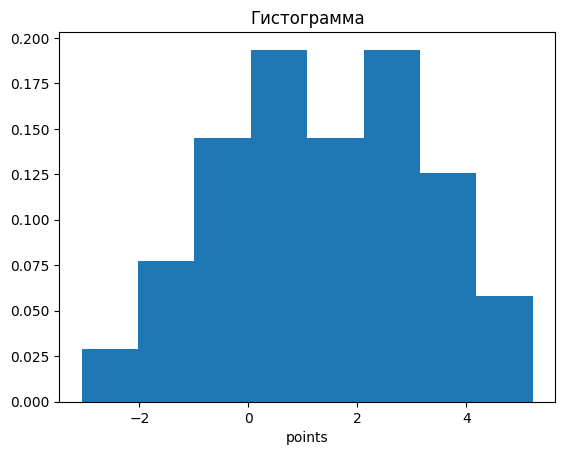

In [11]:
import matplotlib.pyplot as plt
plt.title('Гистограмма')
plt.xlabel('points')
plt.hist(x=array, bins=n, density=True)
plt.show


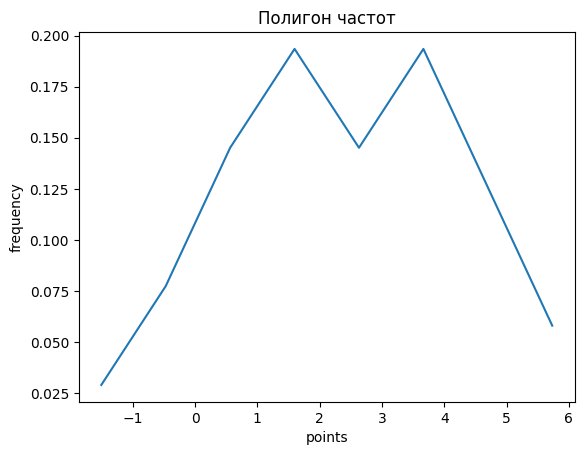

In [12]:
frequencyPoligon = []
for i in range(1, len(interval)):
    frequencyPoligon.append(interval[i]+h/2)
plt.plot(frequencyPoligon, height)
plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()


In [13]:
def Gauss(numb: float) -> float:
    return (1 / (math.sqrt(2 * math.pi)) * math.exp(-1 * numb**2 / 2))


In [29]:
from scipy.stats import norm
a = X
sigma = math.sqrt(s2)
theoretical_probability_of_a_hit = []
for i in range(1, len(interval)):
    theoretical_probability_of_a_hit.append(
        (norm.cdf((interval[i] - a)/sigma) -
         norm.cdf((interval[i-1] - a)/sigma))
    )
print(len(theoretical_probability_of_a_hit))
print('Теоретические вероятности: ')
for i in range(0, len(theoretical_probability_of_a_hit)):
    print(f'{i+1} интервал: {theoretical_probability_of_a_hit[i]}')
print(theoretical_probability_of_a_hit)
print(f'Сумма вероятностей: {sum(theoretical_probability_of_a_hit)}')


8
Теоретические вероятности: 
1 интервал: 0.026200493426348368
2 интервал: 0.06949326772863926
3 интервал: 0.13673196890511163
4 интервал: 0.19959908396896053
5 интервал: 0.2161954873044422
6 интервал: 0.17375708504428244
7 интервал: 0.10361528941314413
8 интервал: 0.04583936130206678
[0.026200493426348368, 0.06949326772863926, 0.13673196890511163, 0.19959908396896053, 0.2161954873044422, 0.17375708504428244, 0.10361528941314413, 0.04583936130206678]
Сумма вероятностей: 0.9714320370929953


In [30]:
print(a)
print(sigma)

1.3574721164999999
1.8685268754733773


In [31]:
xi = sum(list(map(lambda x, y: math.pow((x - 100*y), 2) /
         (100*y), frequency, theoretical_probability_of_a_hit)))
print(f'Хи-квадрат: {xi}')


Хи-квадрат: 3.875241219213663


In [32]:
from scipy.stats import norm, chi2
alpha = 0.1
df = len(frequency) - 1
chi2_critical_value = chi2.ppf(1 - alpha, df)  # Критическое значение
print(f'Значение распределения хи-квадрат: {chi2_critical_value}')


Значение распределения хи-квадрат: 12.017036623780532


In [28]:
if xi >= chi2_critical_value:
    print('Гипотеза о нормальном распределении отвергается')
else: 
    print('Не удалось отвергнуть гипотезу о нормальном распределении')

Гипотеза о нормальном распределении отвергается
